In [19]:
import labeled_functions
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, log_loss
import matplotlib.pyplot as plt

In [20]:
X_train_vector , y_train, X_test_vector , y_test = labeled_functions.split_and_vectorize()

Labeled Data loaded.
Data Vectorized


In [21]:
X_train_vector.shape

(1318, 347)

##### _Experimental_

In [5]:
len(X_train_vector.toarray()[10])

347

In [6]:
X2_train_vector , y2_train, X2_test_vector , y2_test = labeled_functions.split_ngram(1,3)

Labeled Data loaded.
Data Vectorized with ngram


In [7]:
print("X_train_vector: Type:", type(X_train_vector),"\tShape:", X_train_vector.shape)
print("y_train: \tType:", type(y_train),"\t\t\tShape:", len(y_train))
print("X_test_vector: \tType:", type(X_test_vector),"\tShape:", X_test_vector.shape)
print("y_test: \tType:", type(y_test),"\t\t\tShape:", len(y_test))

X_train_vector: Type: <class 'scipy.sparse.csr.csr_matrix'> 	Shape: (1318, 347)
y_train: 	Type: <class 'numpy.ndarray'> 			Shape: 1318
X_test_vector: 	Type: <class 'scipy.sparse.csr.csr_matrix'> 	Shape: (660, 347)
y_test: 	Type: <class 'numpy.ndarray'> 			Shape: 660


In [8]:
len(X2_train_vector.toarray()[100])

482

In [9]:
print("X2_train_vector: Type:", type(X2_train_vector),"\tShape:", X2_train_vector.shape)
print("y2_train: \t Type:", type(y2_train),"\t\t\tShape:", len(y2_train))
print("X2_test_vector:\t Type:", type(X2_test_vector),"\tShape:", X2_test_vector.shape)
print("y2_test: \t Type:", type(y2_test),"\t\t\tShape:", len(y2_test))

X2_train_vector: Type: <class 'scipy.sparse.csr.csr_matrix'> 	Shape: (1318, 482)
y2_train: 	 Type: <class 'numpy.ndarray'> 			Shape: 1318
X2_test_vector:	 Type: <class 'scipy.sparse.csr.csr_matrix'> 	Shape: (660, 482)
y2_test: 	 Type: <class 'numpy.ndarray'> 			Shape: 660


_Experiment ends_ 

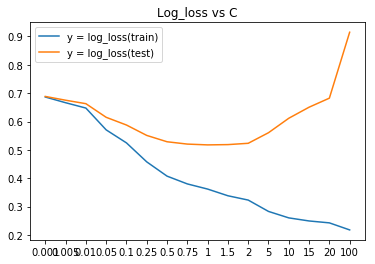

In [22]:
lr_scores=[]
val =[]
for i in [0.001,0.005,0.01,0.05, 0.1,0.25,0.5,0.75,1, 1.5, 2, 5, 10, 15,20, 100]:
    lr = LogisticRegression(C=i, random_state=42, penalty='l2')
    lr.fit(X_train_vector, y_train)
    preds_binary = lr.predict(X_test_vector)
    
    pred_probs_train = lr.predict_proba(X_train_vector)
    pred_probs = lr.predict_proba(X_test_vector)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, preds_binary)
#     print(precision, recall)
    lr_scores.append((i, lr.score(X_train_vector, y_train), lr.score(X_test_vector, y_test)))
    val.append((log_loss(y_train, pred_probs_train), log_loss(y_test, pred_probs)))
    

# print([lr_scores[x] for x in range(len(lr_scores))])
x = [str(lr_scores[x][0]) for x in range(len(lr_scores))]
# print(x)

# plt.plot(x, [lr_scores[x][1] for x in range(len(lr_scores))])
# plt.plot(x, [lr_scores[x][2] for x in range(len(lr_scores))])
plt.plot(x, [val[x][0] for x in range(len(val))])
plt.plot(x, [val[x][1] for x in range(len(val))])
plt.legend(['y = log_loss(train)', 'y = log_loss(test)'], loc='upper left')
plt.title("Log_loss vs C")
plt.show()

# print([val[x] for x in range(len(val))])

In [23]:
lr_scores

[(0.001, 0.6031866464339909, 0.5833333333333334),
 (0.005, 0.6783004552352049, 0.6272727272727273),
 (0.01, 0.7132018209408194, 0.646969696969697),
 (0.05, 0.8042488619119879, 0.7015151515151515),
 (0.1, 0.8406676783004552, 0.7181818181818181),
 (0.25, 0.8558421851289834, 0.7454545454545455),
 (0.5, 0.8786039453717754, 0.7545454545454545),
 (0.75, 0.881638846737481, 0.759090909090909),
 (1, 0.8831562974203339, 0.759090909090909),
 (1.5, 0.8846737481031867, 0.7636363636363637),
 (2, 0.8915022761760243, 0.7621212121212121),
 (5, 0.8998482549317147, 0.7439393939393939),
 (10, 0.9081942336874052, 0.7484848484848485),
 (15, 0.909711684370258, 0.7454545454545455),
 (20, 0.9119878603945372, 0.7439393939393939),
 (100, 0.9157814871016692, 0.7484848484848485)]

In [24]:
# best C=0.5
lr = LogisticRegression(C=0.5)
lr.fit(X_train_vector, y_train)
preds_binary = lr.predict(X_test_vector)
preds_prob = lr.predict_proba(X_test_vector)
lr.score(X_test_vector, y_test)
lr.score(X_train_vector, y_train)

0.8786039453717754

In [25]:
confusion_matrix(y_test, preds_binary)

array([[263,  85],
       [ 77, 235]])

In [26]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, preds_binary)

In [27]:
precision , recall

(array([0.77352941, 0.734375  ]), array([0.75574713, 0.75320513]))